In [4]:
!pip install tensorflow

In [11]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Build a Neural Network
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [4]:
#Load the datast

data = pd.read_csv('C:/Users/Swett/Downloads/diabetes.csv')

In [5]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

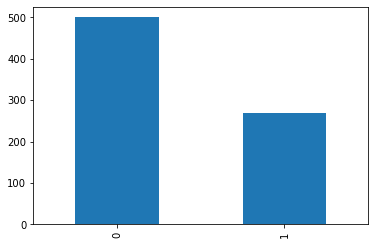

In [6]:
import seaborn as sns
data['Outcome'].value_counts().plot(kind='bar')

In [7]:
#Preparing Data for modelling
#split into input(X) and output(y) variables
predictors = data.iloc[:,0:8]
response = data.iloc[:,8]

In [8]:
#create training and testing variables
x_train,x_test,y_train,y_test = train_test_split(predictors,response,test_size = 0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [9]:
#define the keras model - layer by layer model
kerasmodel=Sequential()
kerasmodel.add(Dense(12, input_dim=8, activation='relu'))
kerasmodel.add(Dense(8, activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [10]:
# compiling model
kerasmodel.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [11]:
# fitting model
kerasmodel.fit(x_train,y_train,epochs=150,batch_size = 10)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 1.8595 - accuracy: 0.5537
Epoch 2/150
62/62 [==============================] - 0s 1ms/step - loss: 0.8940 - accuracy: 0.6287
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7804 - accuracy: 0.6303
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7045 - accuracy: 0.6515
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.6726
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6743
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6743
Epoch 8/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6906
Epoch 9/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.6938
Epoch 10/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6808
Epoch 11/

In [12]:
#Train accuracy
_, accuracy = kerasmodel.evaluate(x_train,y_train)
print('Train accuracy: %2f' %(accuracy*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7801
Train accuracy: 78.013027
